In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import re
# import pylab

In [2]:
def loadData(str):
    fr = open(str)
    sArr = [line.strip().split("\t") for line in fr.readlines()]
    sArr = sArr[1:]
    # a = sArr[0][1]
    # print(a.split(','))
    # a = [line for line in sArr]
    datArr = []
    for line in sArr:
        dataRow = []
        for s in line[1].split(','):
            dataRow.append(float(s))
        datArr.append(dataRow)
    # print(datArr)
    # datArr = [[float(s) for s in line[1].split(',')] for line in sArr]
    # datArr = [[float(s) for s in line[1][1:-1].split(", ")] for line in sArr]

    matA = np.mat(datArr)
    print(matA.shape)
    nameArr = [line[0] for line in sArr]
    return matA, nameArr

In [3]:
def pca(inputM, k):
    covMat = cov(inputM, rowvar=0)        
    eigVals,eigVects = linalg.eig(covMat) 
    sorted_val = argsort(eigVals)
    index = sorted_val[:-(k+1):-1]
    Vects = eigVects[:,index]
    outputM = inputM * Vects
    return outputM

In [4]:
def findIndex(tripleIndex):
    # tripleIndex = [0, 3, 5]
    with open('train.txt', 'r') as f:
        lines = f.readlines()
        triples = [lines[i].strip().split("\t") for i in tripleIndex]
        print(triples)
        h_t = [t[0] for t in triples] + [t[2] for t in triples]
        r = [t[1] for t in triples]

    with open("entityEmbedding.txt", 'r') as f:
        dataE = [line.strip().split("\t") for line in f.readlines()]
        dataE = dataE[1:]
        dataE = [i[0] for i in dataE]
        indexE = [dataE.index(i) for i in h_t]
    #     for i in h_t:
    #         indexE.append()

    with open("relationEmbedding.txt", 'r') as f:
        dataR = [line.strip().split("\t") for line in f.readlines()]
        dataR = dataR[1:]
        dataR = [i[0] for i in dataR]
        indexR = [dataR.index(i) for i in r]
        indexR = [i + 14951 for i in indexR]

    return indexE, indexR

In [5]:
def plotV(data, labels, indexE, indexR, fig_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print("aaa")
    font = { 'fontname':'Tahoma', 'fontsize':10, 'verticalalignment': 'top', 'horizontalalignment':'center' }
    data= array(data)
#     print(data[:, 0])
#     ax.scatter(data[:, 0].tolist(), data[:, 1].tolist(), marker ='o')
    for i in indexE:
        x = data[:, 0][i]
        y = data[:, 1][i]
        print(x,y)
        ax.scatter(x, y, marker ='o')
    ax.set_xlim(-0.8,0.8)
    ax.set_ylim(-0.8,0.8)

    for i in indexE:
        x = data[:, 0][i]
        y = data[:, 1][i]
        ax.annotate(labels[i], xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)
    
    for i in indexR:
        x = data[:, 0][i]
        y = data[:, 1][i]
        print(x,y)
#         ax.scatter(x, y, marker ='o')
        ax.quiver(0,0,x,y,angles='xy', scale_units='xy', scale=1, width = 0.005)
        ax.annotate(labels[i], xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)
    
#     for label, x, y in zip(labels, data[:, 0][:5], data[:, 1][:5]):
#         # i += 1
#         # s = random.uniform(0,100)
#         # if i<14951:
#         #     if s > 99:
#         #         continue
#         # else:
#         #     if s > 99:
#         #         continue
#         ax.annotate(label, xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)


    plt.title('TransE pca2dim')
    plt.xlabel('X')
    plt.ylabel('Y')
    print("ddd")
    plt.savefig(fig_name,dpi = 1000)
    plt.show()

In [67]:
def plotVector(data, labels, indexE, indexR, fig_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    font = { 'fontname':'Tahoma', 'fontsize':10, 'verticalalignment': 'top', 'horizontalalignment':'center' }
    data= array(data)
    clist=['r','g','b','c','m','y','k','darkorange','lightgreen','plum','tan','khaki','pink','skyblue','lawngreen','salmon','grey','darkviolet','turquoise']

#     print(data[:, 0])
#     ax.scatter(data[:, 0].tolist(), data[:, 1].tolist(), marker ='o')
    for i in range(len(indexR)):
        n = len(indexR)
        cindex = i%len(clist)
        print(cindex)
        x1 = data[:, 0][indexE[i]]
        y1 = data[:, 1][indexE[i]]
        x2 = data[:, 0][indexE[i+n]]
        y2 = data[:, 1][indexE[i+n]]
        x = [x1] + [x2]
        y = [y1] + [y2]
        x_r = data[:, 0][indexR[i]]
        y_r = data[:, 1][indexR[i]]
        
        # enity
        ax.scatter(x, y, marker ='o',color = clist[cindex])
        
        #relation
        ax.quiver(x1,y1,x_r,y_r,angles='xy', scale_units='xy', scale=1, width = 0.005,color = clist[cindex])
        
        
        # labels
#         ax.annotate("h {}".format(i), xy = (x1, y1), xytext = None, ha = 'right', va = 'bottom', **font)
#         ax.annotate("t {}".format(i), xy = (x2, y2), xytext = None, ha = 'right', va = 'bottom', **font)
#         ax.annotate("r {}".format(i), xy = (x1+x_r, y1+y_r), xytext = None, ha = 'right', va = 'bottom', **font)
        ax.annotate(labels[indexE[i]], xy = (x1, y1), xytext = None, ha = 'right', va = 'bottom', **font)
        ax.annotate(labels[indexE[i+n]], xy = (x2, y2), xytext = None, ha = 'right', va = 'bottom', **font)
        ax.annotate(labels[indexR[i]], xy = (x1+x_r, y1+y_r), xytext = None, ha = 'right', va = 'bottom', **font)
        
        
#     for label, x, y in zip(labels, data[:, 0][:5], data[:, 1][:5]):
#         # i += 1
#         # s = random.uniform(0,100)
#         # if i<14951:
#         #     if s > 99:
#         #         continue
#         # else:
#         #     if s > 99:
#         #         continue
#         ax.annotate(label, xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)

    ax.set_xlim(-0.8,0.8)
    ax.set_ylim(-0.8,0.8)

    plt.title('TransE pca2dim')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(fig_name,dpi = 100)
    plt.show()

## Read map.txt and convert label to entity name

In [75]:
def label_to_name(label_list):  
    name_map = {}
    with open('map.txt', "r", encoding="utf-8") as fp:
        s = fp.readlines()
        for line in s:
            token = line.strip().split("\t")
            name_map[token[0]] = token[1]
    for i in range(len(label_list)):
        if label_list[i] in name_map:
            label_list[i] = name_map[label_list[i]]
    return label_list

## convert label to relation name

In [76]:
def label_to_relation_name(nameRelation):
    for i,s in enumerate(nameRelation):
        prefix = re.search('/(.*)/',s)
        result = s[prefix.span()[1]:]
        nameRelation[i] = result
#         print(s[prefix.span()[1]:])
    return nameRelation

# Plot example

In [72]:
# data
dirEntity = "entityEmbedding_99.txt"
dirRelation = "relationEmbedding_99.txt"
matEntity, nameEntity = loadData(dirEntity)
matRelation, nameRelation = loadData(dirRelation)
matr = row_stack((matEntity, matRelation))
print(matr.shape)

nameRelation = label_to_relation_name(nameRelation)
nameList = nameEntity + nameRelation
nameList = label_to_name(nameList)

# find index
tripleIndex = [0]
indexE, indexR = findIndex(tripleIndex)

(14951, 100)
(1345, 100)
(16296, 100)
[['/m/027rn', '/location/country/form_of_government', '/m/06cx9']]


0


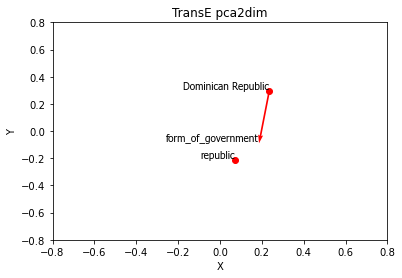

In [74]:
# plot
k = 2
a = pca(matr, k)
# plotV(a, nameList, indexE, indexR, 'head and relation')
plotVector(a, nameList, indexE, indexR,'h+r')

1000 perfect example

## Create map.txt

In [52]:
with open('fb2w.nt', 'r') as f:
    lines = f.readlines()[4:]
    triples = [line.split("\t") for line in lines]
    triples = [[triple[0],triple[2]] for triple in triples]

for entities in triples:
    entities[0] = re.sub(r'<http://rdf.freebase.com/ns', "", entities[0])
    entities[0] = re.sub(r'>', "", entities[0])
    entities[0] = re.sub(r'\.', "/", entities[0])
    entities[1] = re.sub(r' .\n', "", entities[1])
    entities[1] = re.sub('[<>]', "", entities[1])

In [53]:
triples

[['/m/0695j', 'http://www.wikidata.org/entity/Q6718'],
 ['/m/05nrg', 'http://www.wikidata.org/entity/Q538'],
 ['/m/0jgd', 'http://www.wikidata.org/entity/Q414'],
 ['/m/0d_23', 'http://www.wikidata.org/entity/Q2537'],
 ['/m/04g7d', 'http://www.wikidata.org/entity/Q315'],
 ['/m/09bcm', 'http://www.wikidata.org/entity/Q313'],
 ['/m/09q84', 'http://www.wikidata.org/entity/Q319'],
 ['/m/0jbxl', 'http://www.wikidata.org/entity/Q7343'],
 ['/m/09cws', 'http://www.wikidata.org/entity/Q111'],
 ['/m/05ywg', 'http://www.wikidata.org/entity/Q1085'],
 ['/m/0h9wp', 'http://www.wikidata.org/entity/Q9333'],
 ['/m/0b90_r', 'http://www.wikidata.org/entity/Q96'],
 ['/m/05qtj', 'http://www.wikidata.org/entity/Q90'],
 ['/m/02mm_', 'http://www.wikidata.org/entity/Q11379'],
 ['/m/0zl3', 'http://www.wikidata.org/entity/Q11376'],
 ['/m/01h1s', 'http://www.wikidata.org/entity/Q589'],
 ['/m/03gyl', 'http://www.wikidata.org/entity/Q790'],
 ['/m/03shp', 'http://www.wikidata.org/entity/Q794'],
 ['/m/025s7x6', 'http:

In [84]:
label_list = [t[0] for t in triples]
# map_list = []
for label in nameEntity1:
    try:
        index = label_list.index(label)
        qlabel = triples[index][1][31:]
        url = triples[index][1]
#         print(label)
#         print(url)
#         print(qlabel)
        headers = {"Accept" : "application/json"}
        s = requests.get(url, headers=headers)
        data = s.json()
        name = data['entities'][qlabel]['labels']['en']['value']
        map_list.append([label, name])
    except ValueError:
        print("label not in file")
    except KeyError:
        print("redirect")
        map_list.append([label, url])
    except TimeoutError:
        print("TimeoutError")
        map_list.append([label, url])

label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
redirect
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
redirect
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not in file
label not 

In [85]:
with open('map.txt', "w", encoding="utf-8") as fp:
    for t in map_list:
        fp.write("{}\t{}\n".format(t[0], t[1]))

# Generate image for gif

In [77]:
# data
dirEntity = "entityEmbedding_99.txt"
dirRelation = "relationEmbedding_99.txt"
matEntity, nameEntity = loadData(dirEntity)
matRelation, nameRelation = loadData(dirRelation)
matr = row_stack((matEntity, matRelation))
covMat = cov(matr, rowvar=0)        
eigVals,eigVects = linalg.eig(covMat) 
sorted_val = argsort(eigVals)
k = 2
index = sorted_val[:-(k+1):-1]
embed99_Vects = eigVects[:,index]

# outputM = inputM * embed99_Vects

(14951, 100)
(1345, 100)


(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
0
0


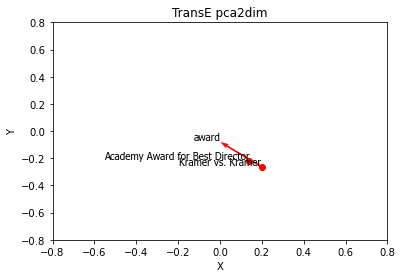

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
1
0


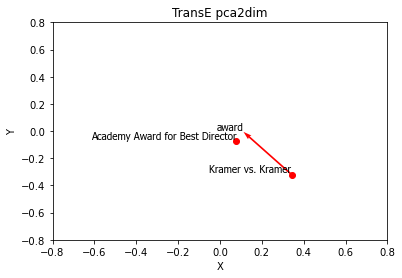

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
2
0


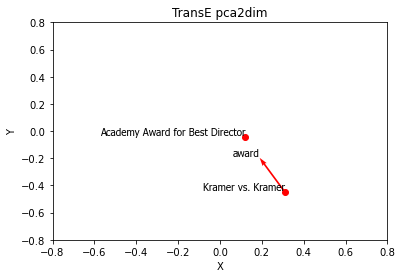

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
3
0


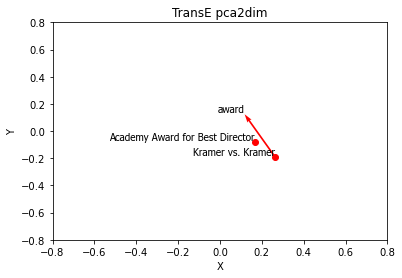

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
4
0


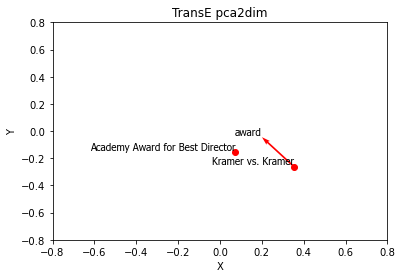

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
5
0


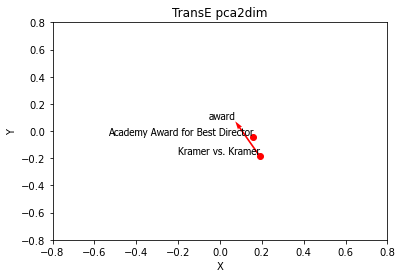

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
6
0


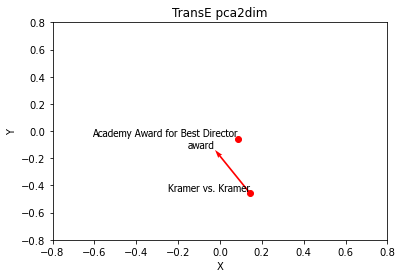

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
7
0


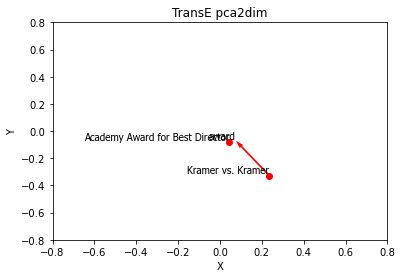

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
8
0


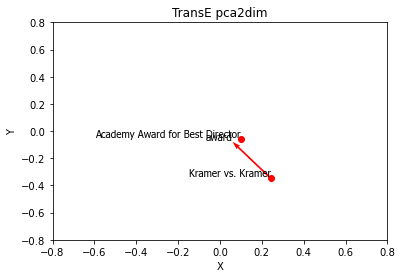

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
9
0


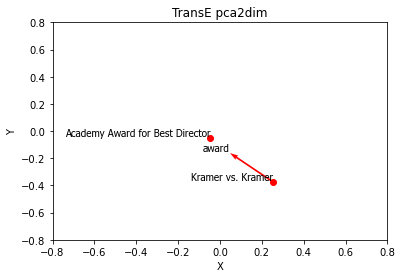

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
10
0


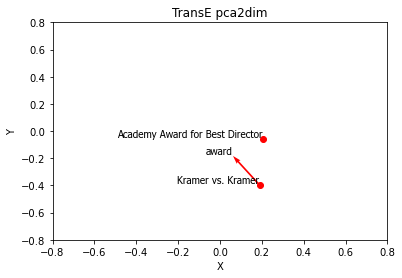

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
11
0


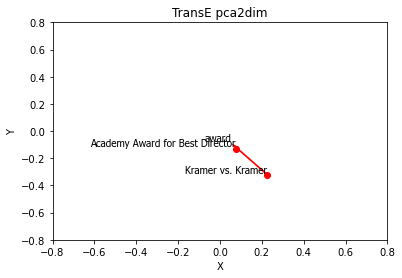

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
12
0


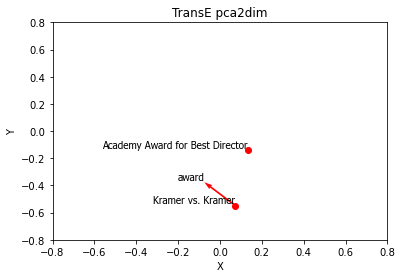

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
13
0


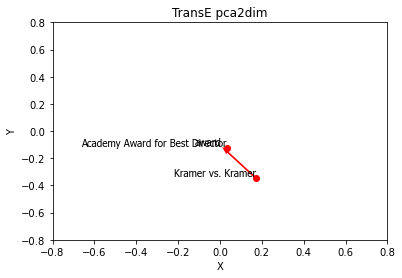

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
14
0


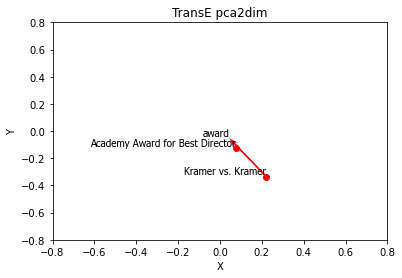

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
15
0


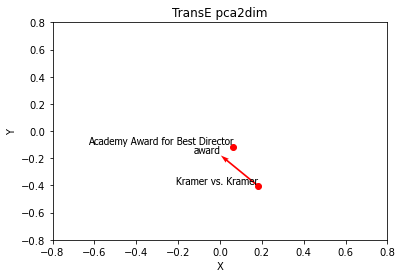

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
16
0


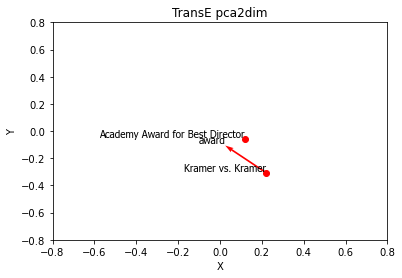

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
17
0


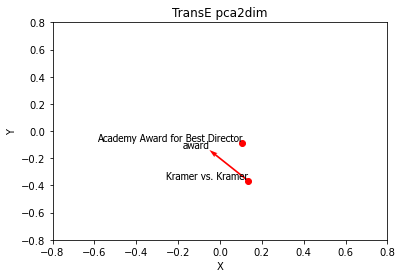

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
18
0


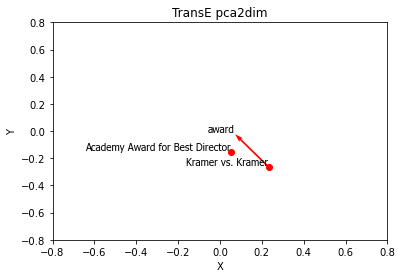

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
19
0


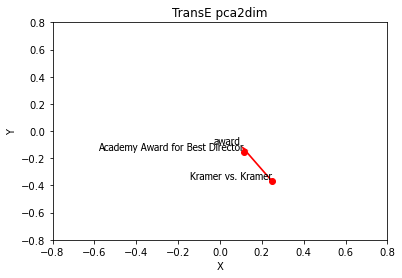

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
20
0


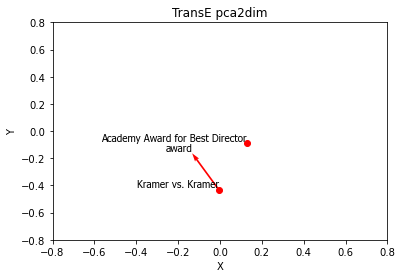

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
21
0


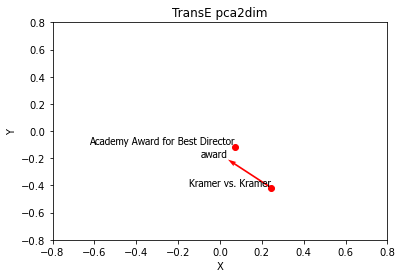

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
22
0


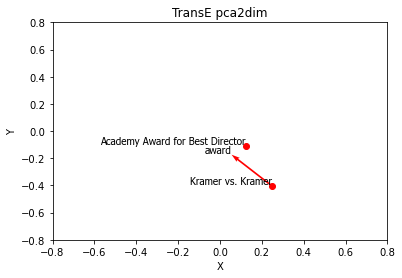

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
23
0


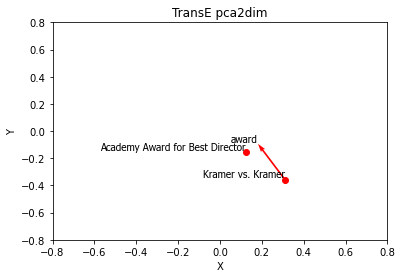

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
24
0


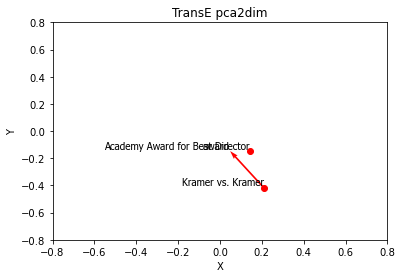

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
25
0


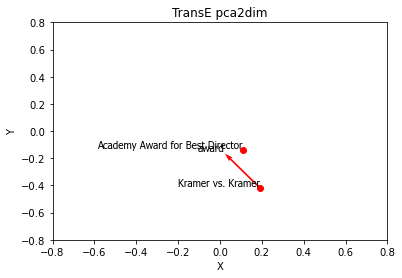

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
26
0


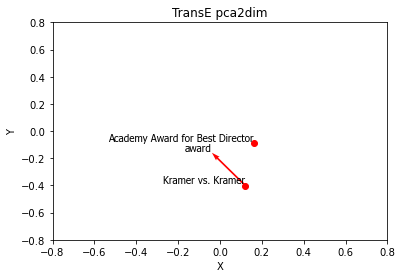

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
27
0


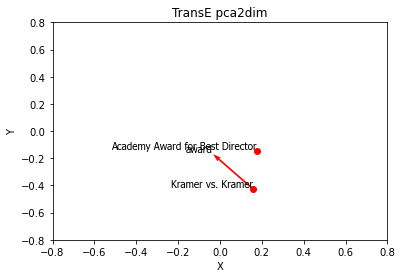

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
28
0


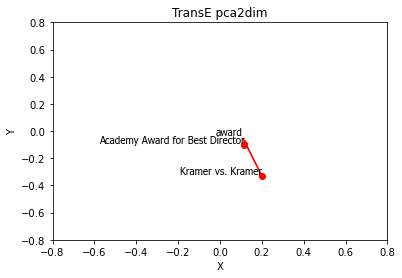

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
29
0


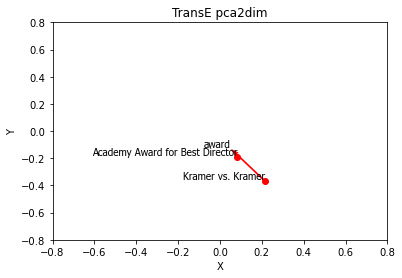

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
30
0


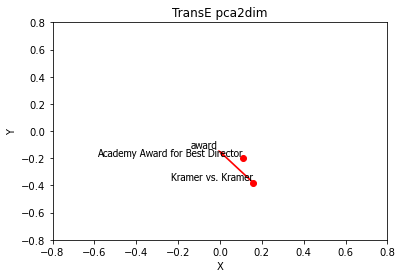

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
31
0


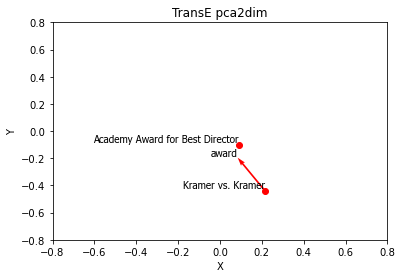

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
32
0


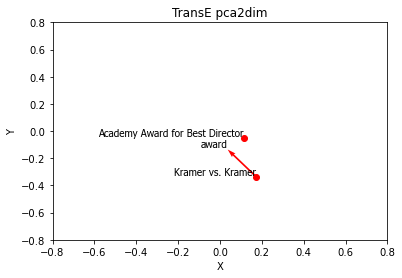

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
33
0


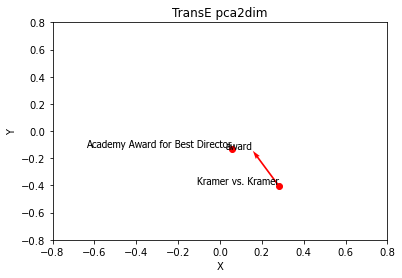

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
34
0


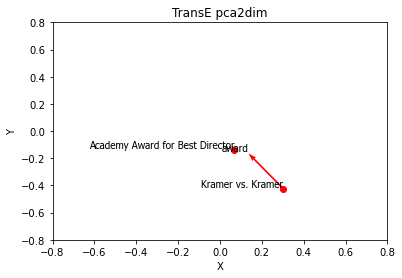

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
35
0


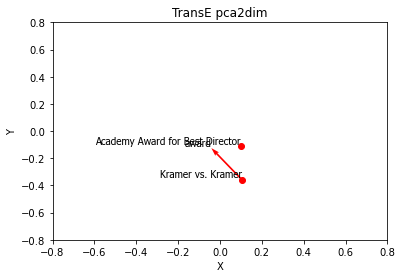

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
36
0


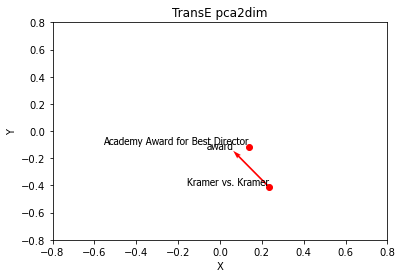

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
37
0


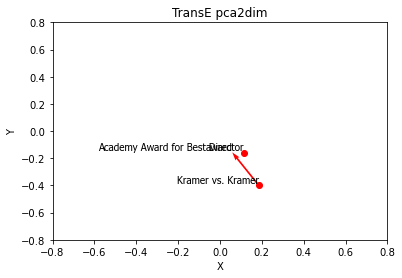

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
38
0


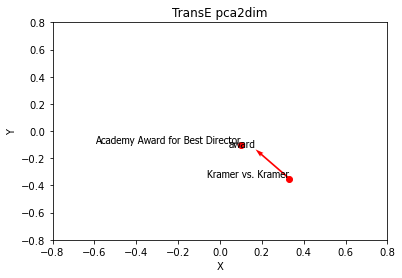

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
39
0


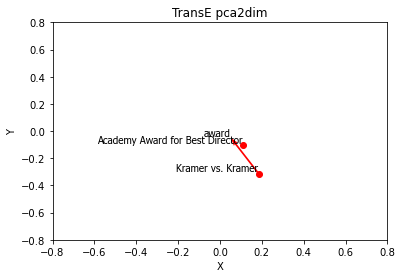

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
40
0


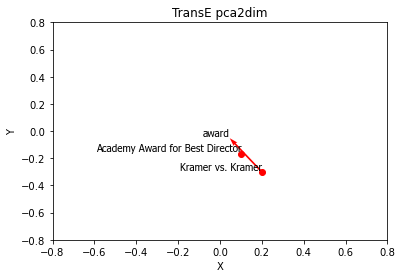

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
41
0


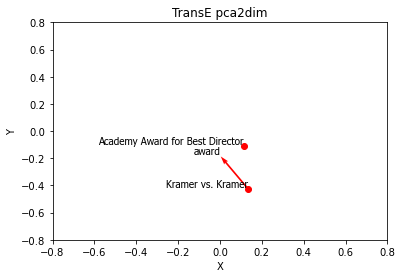

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
42
0


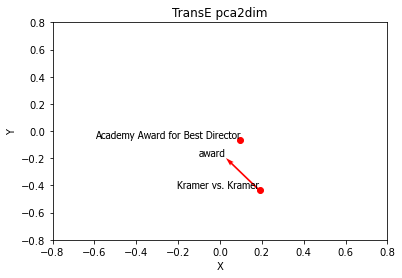

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
43
0


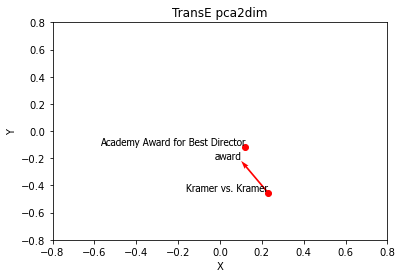

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
44
0


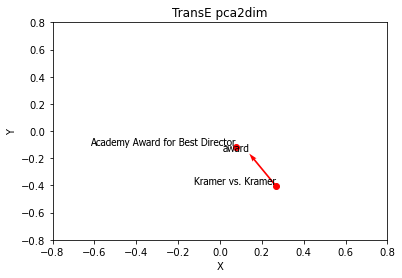

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
45
0


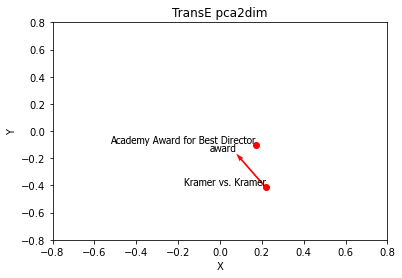

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
46
0


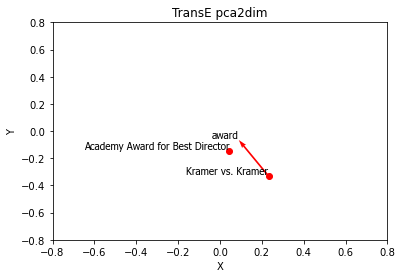

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
47
0


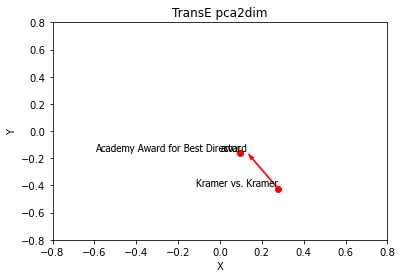

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
48
0


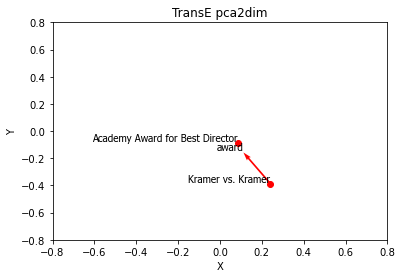

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
49
0


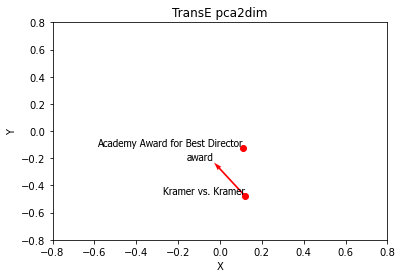

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
50
0


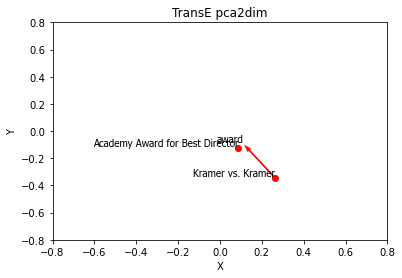

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
51
0


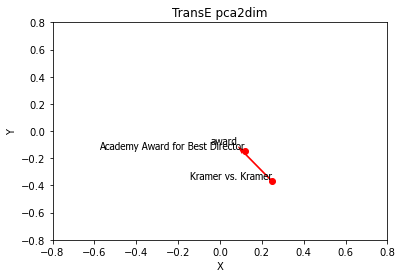

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
52
0


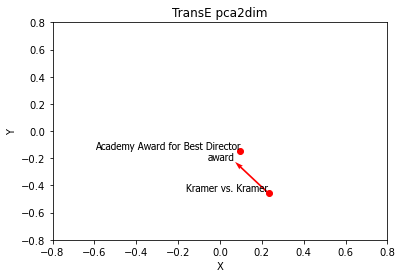

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
53
0


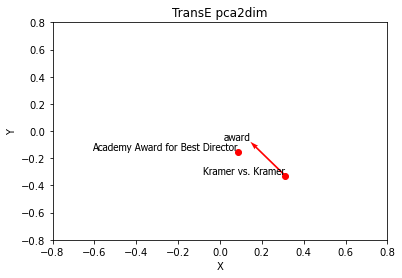

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
54
0


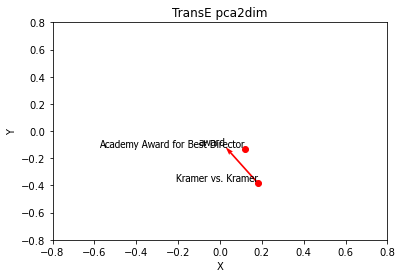

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
55
0


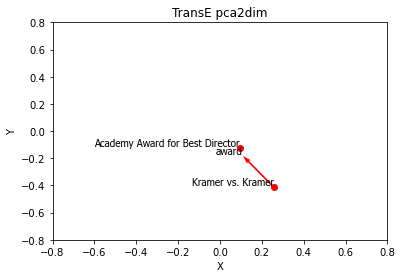

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
56
0


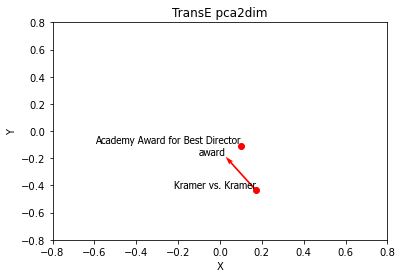

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
57
0


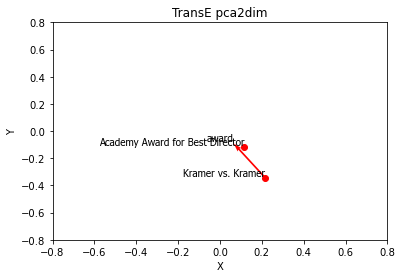

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
58
0


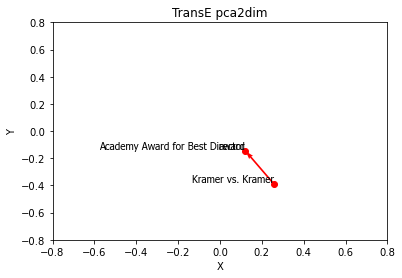

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
59
0


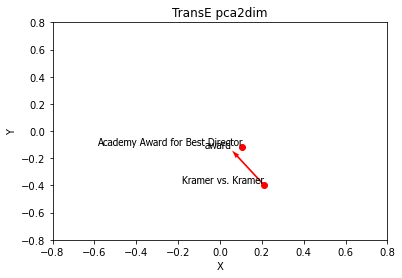

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
60
0


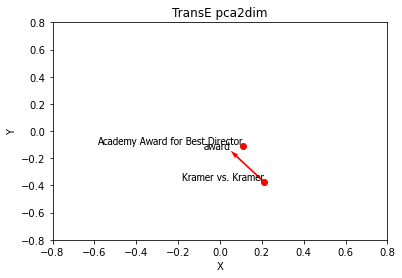

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
61
0


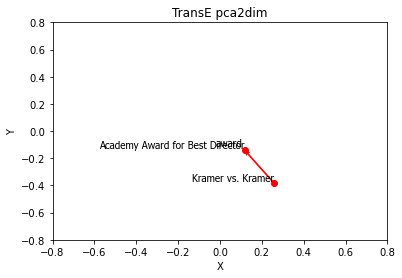

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
62
0


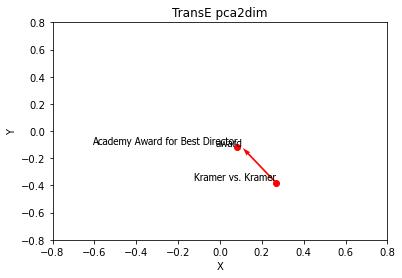

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
63
0


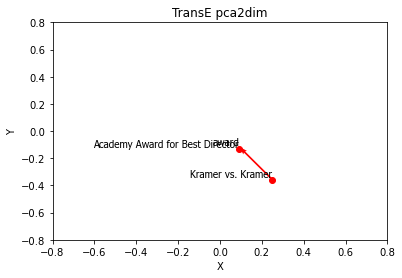

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
64
0


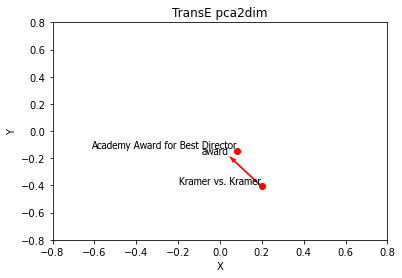

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
65
0


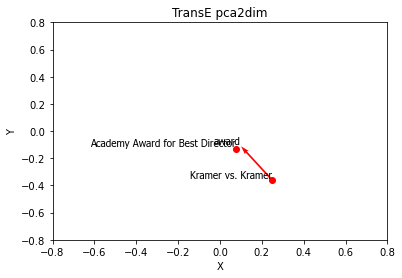

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
66
0


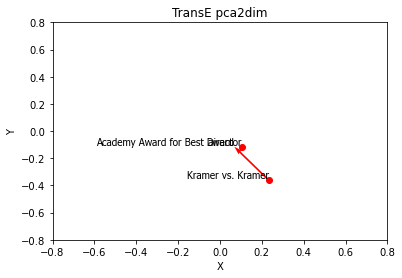

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
67
0


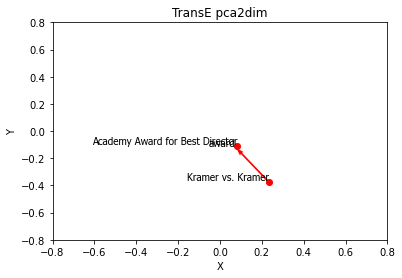

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
68
0


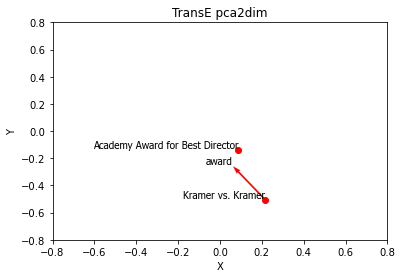

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
69
0


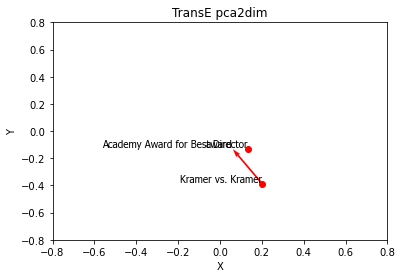

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
70
0


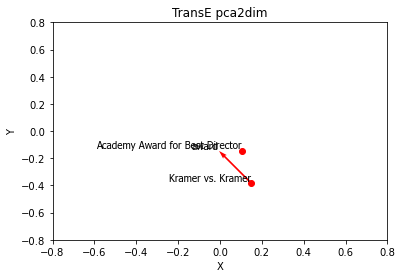

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
71
0


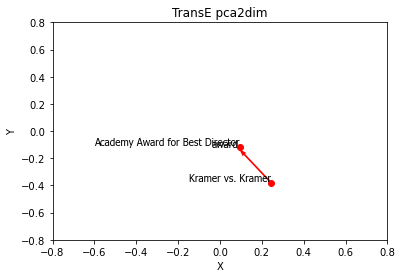

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
72
0


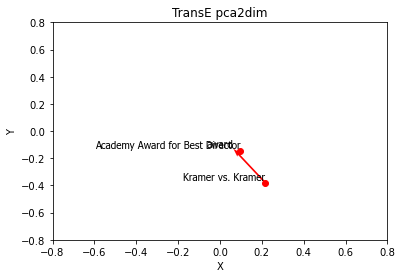

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
73
0


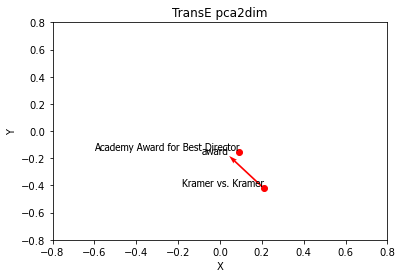

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
74
0


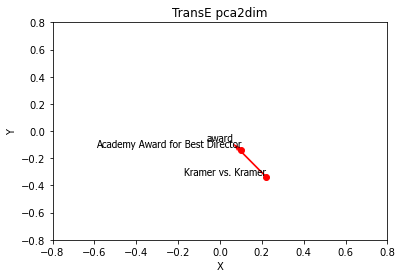

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
75
0


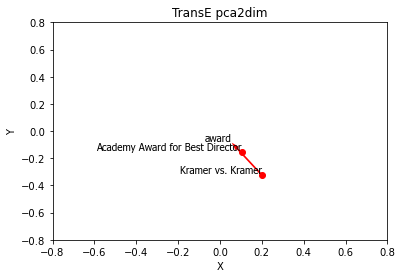

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
76
0


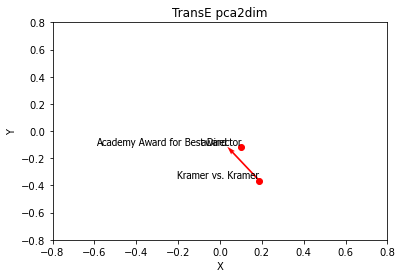

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
77
0


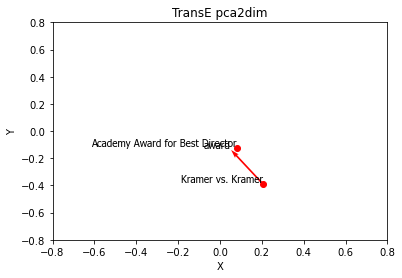

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
78
0


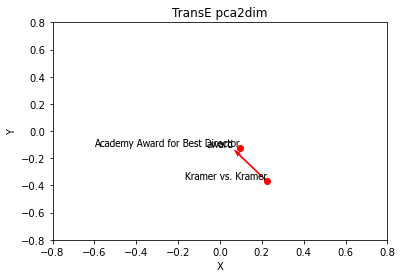

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
79
0


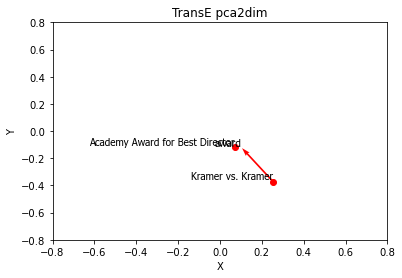

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
80
0


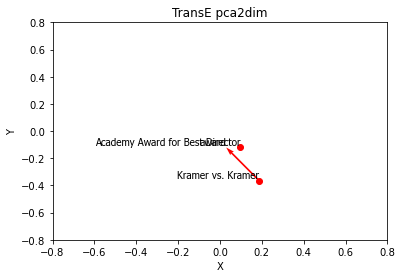

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
81
0


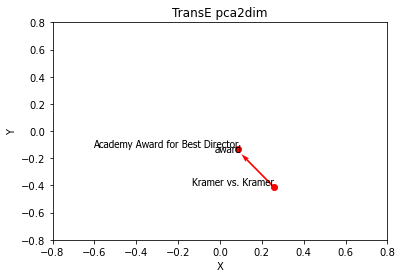

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
82
0


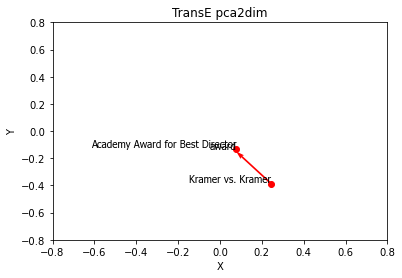

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
83
0


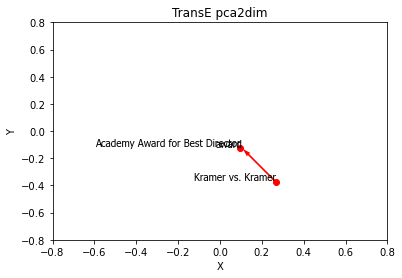

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
84
0


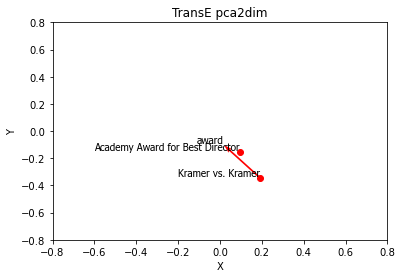

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
85
0


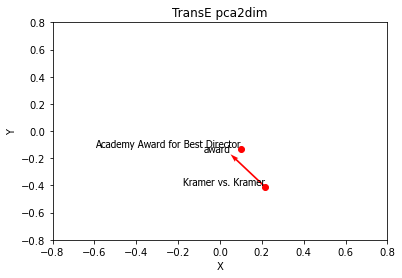

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
86
0


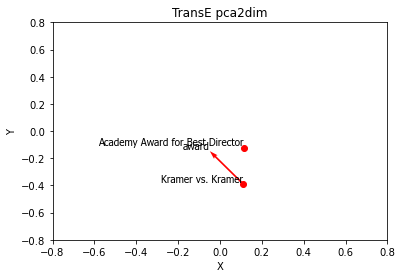

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
87
0


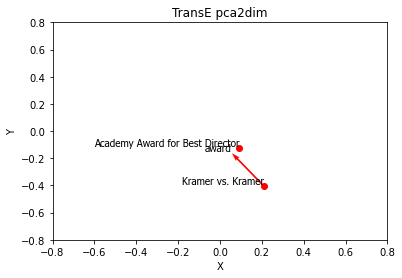

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
88
0


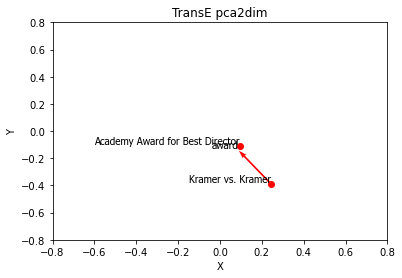

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
89
0


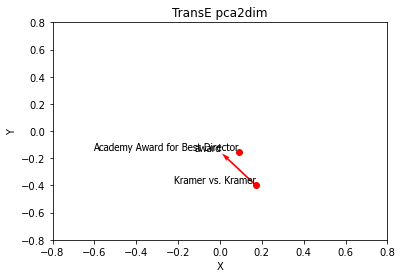

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
90
0


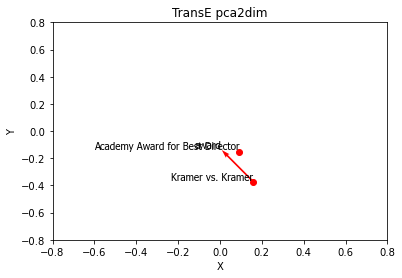

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
91
0


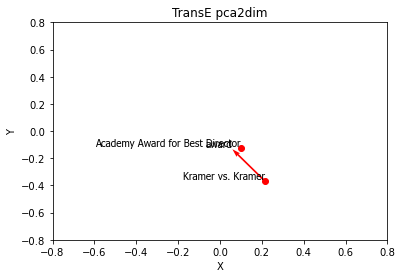

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
92
0


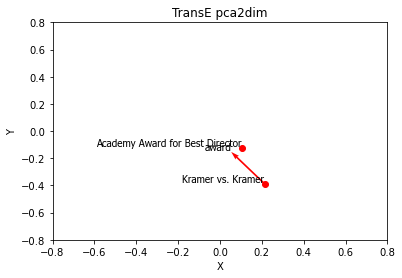

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
93
0


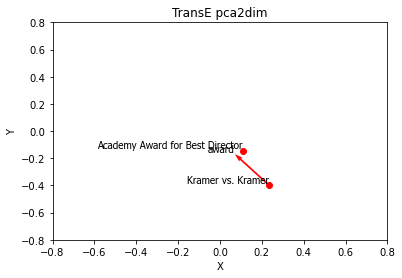

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
94
0


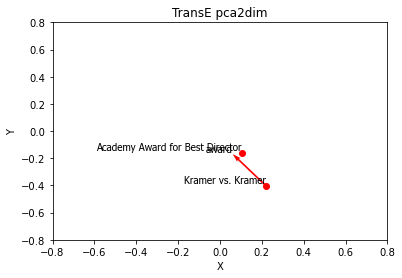

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
95
0


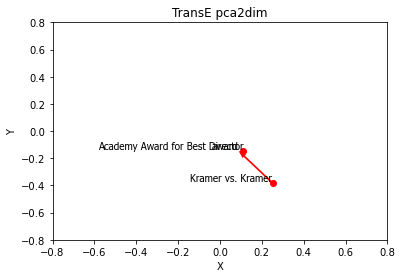

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
96
0


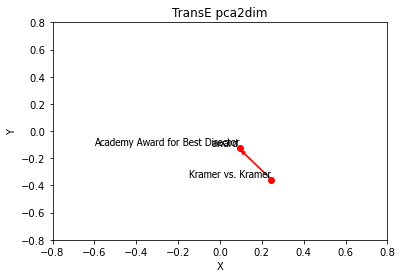

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
97
0


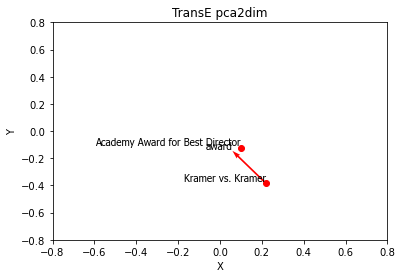

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
98
0


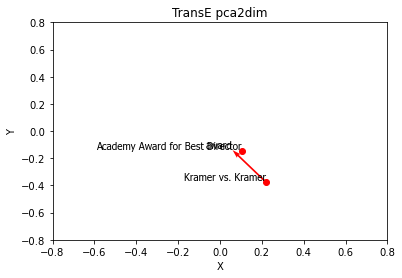

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
99
0


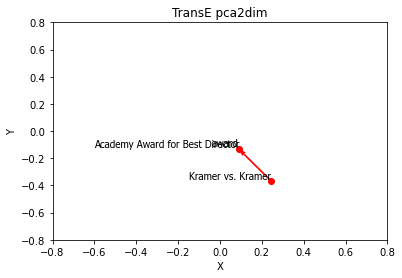

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
100
0


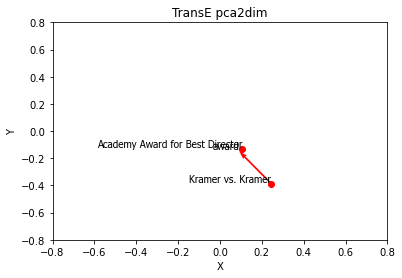

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
101
0


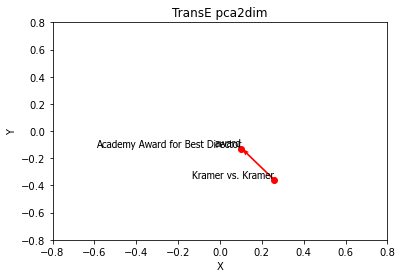

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
102
0


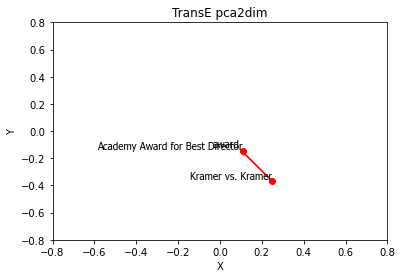

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
103
0


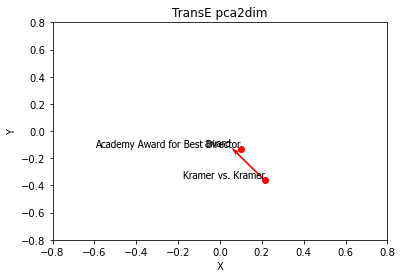

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
104
0


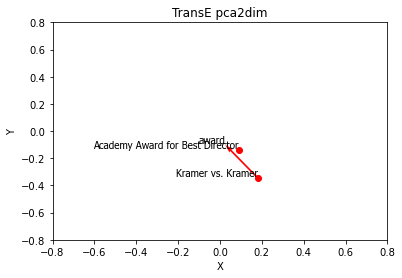

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
105
0


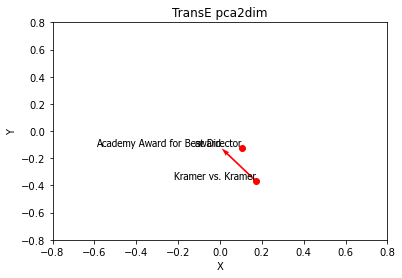

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
106
0


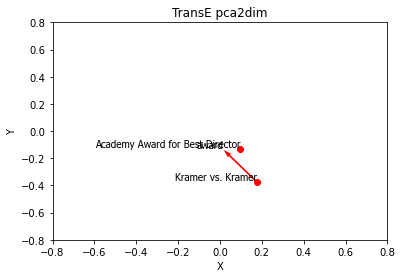

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
107
0


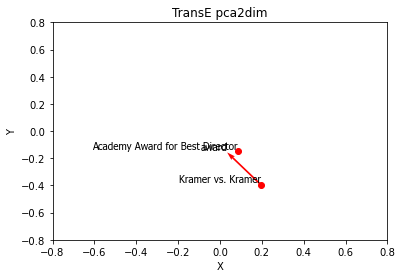

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
108
0


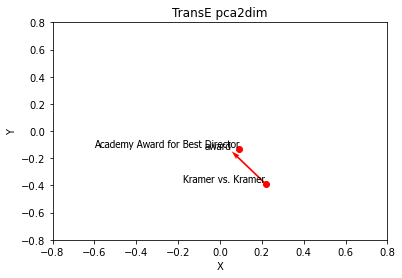

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
109
0


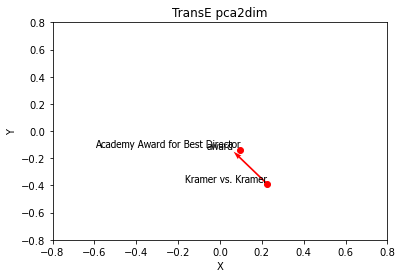

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
110
0


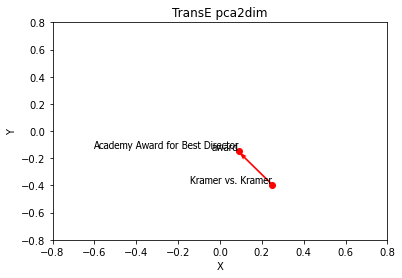

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
111
0


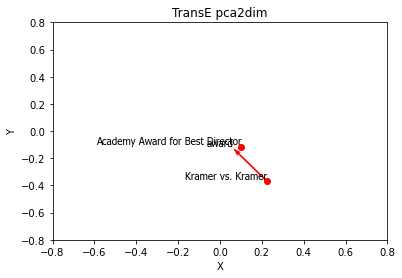

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
112
0


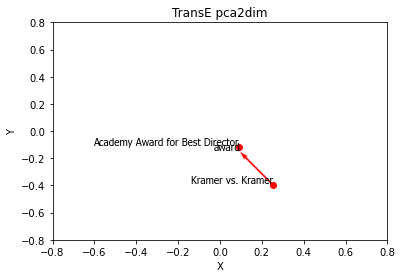

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
113
0


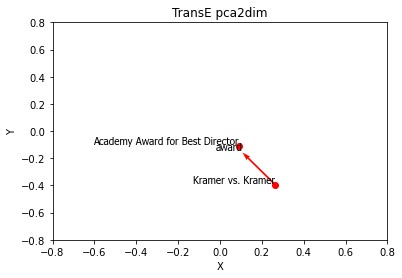

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
114
0


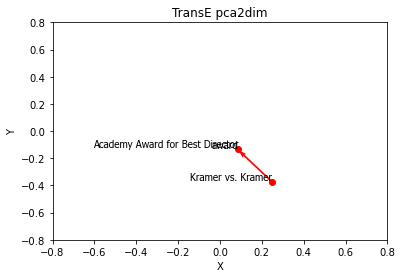

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
115
0


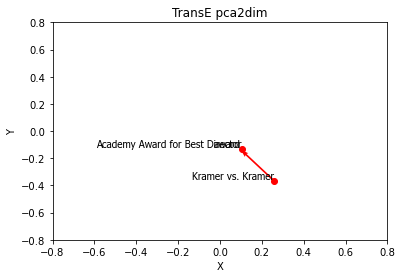

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
116
0


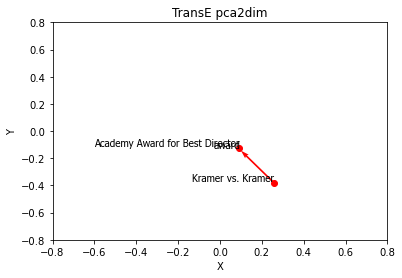

(14951, 100)
(1345, 100)
[['/m/0p_th', '/award/award_nominated_work/award_nominations./award/award_nomination/award', '/m/0gs9p']]
117
0


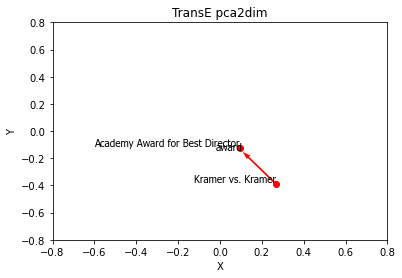

In [79]:
for i in range(0,118):
    
    # data
    dirEntity = "embed/entityEmbedding_"+str(i)+".txt"
    dirRelation = "embed/relationEmbedding_"+str(i)+".txt"
#     print(dirEntity, dirRelation)
    matEntity, nameEntity = loadData(dirEntity)
    matRelation, nameRelation = loadData(dirRelation)
    matr = row_stack((matEntity, matRelation))
#     print(matr.shape)
#     nameList = nameEntity + nameRelation
#     nameList = label_to_name(nameList)
    nameRelation = label_to_relation_name(nameRelation)
    nameList = nameEntity + nameRelation
    nameList = label_to_name(nameList)


    # find index
    tripleIndex = [1000]
    indexE, indexR = findIndex(tripleIndex)
    
    #plot
    k = 2
#     a = pca(matr, k)
    a = matr * embed99_Vects
    fig_name = 'image/'+ str(i)
    print(i)
    plotVector(a, nameList, indexE, indexR, fig_name)

# Mining data features

k-means

In [16]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [17]:
# data
dirEntity = "entityEmbedding_99.txt"
dirRelation = "relationEmbedding_99.txt"
matEntity, nameEntity = loadData(dirEntity)
matRelation, nameRelation = loadData(dirRelation)

arrayEntity = array(pca(matEntity,2))
arrayRelation = array(pca(matRelation,2))

nameList = label_to_name(nameEntity)

(14951, 100)
(1345, 100)


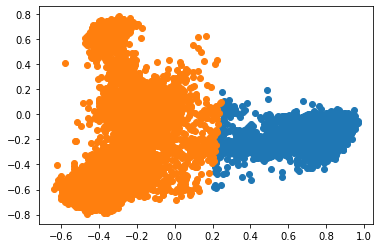

In [18]:
a = array(arrayEntity)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(a)
# assign a cluster to each example
yhat = model.predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
#     print(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

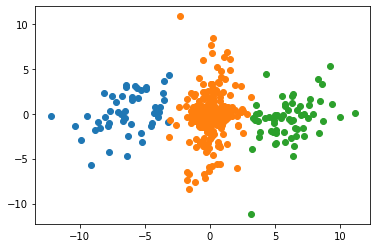

In [19]:
a = array(arrayRelation)
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(a)
# assign a cluster to each example
yhat = model.predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
#     print(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

mean-shift

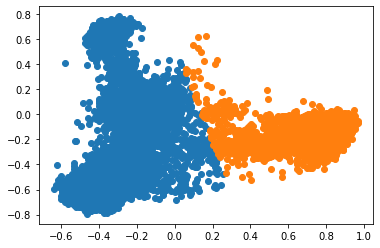

In [34]:
from sklearn.cluster import MeanShift
# define dataset
a = array(arrayEntity)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

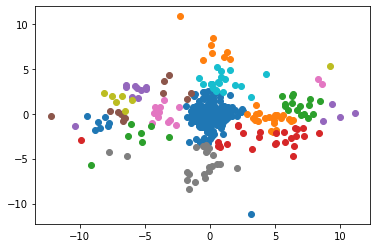

In [35]:
# define dataset
a = array(arrayRelation)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

T-SNE Entity

In [21]:
from sklearn.manifold import TSNE
arrayEntity = array(matEntity)
Entity_embedded = TSNE(n_components=2, init='random').fit_transform(arrayEntity)

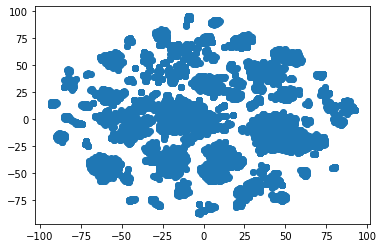

In [23]:
pyplot.scatter(Entity_embedded[:,0], Entity_embedded[:,1])
pyplot.show()

MeanShift

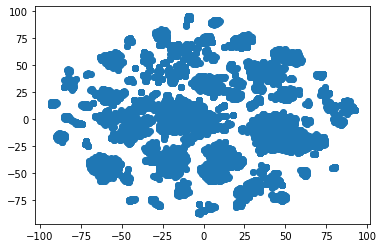

In [24]:
# mean shift clustering
from sklearn.cluster import MeanShift
# define dataset
a = array(Entity_embedded)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

k-means

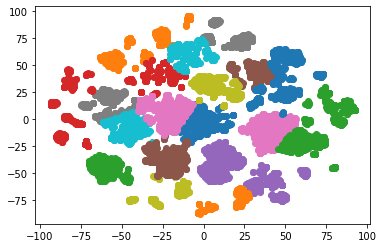

In [28]:
a = array(Entity_embedded)
# define the model
model = KMeans(n_clusters=25)
# fit the model
model.fit(a)
# assign a cluster to each example
yhat = model.predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
#     print(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

In [29]:
from sklearn.manifold import TSNE
arrayRelation = array(arrayRelation)
Relation_embedded = TSNE(n_components=2, init='random').fit_transform(arrayRelation)

T-SNE relation

k-means

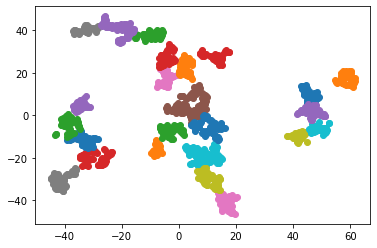

In [36]:
a = array(Relation_embedded)
# define the model
model = KMeans(n_clusters=25)
# fit the model
model.fit(a)
# assign a cluster to each example
yhat = model.predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
#     print(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()

mean-shift

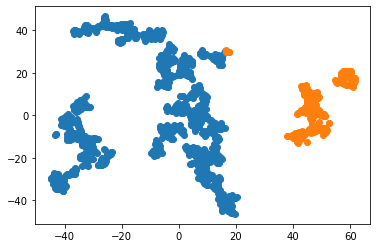

In [37]:
# mean shift clustering
from sklearn.cluster import MeanShift
# define dataset
a = array(Relation_embedded)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
# show the plot
pyplot.show()